# **INTRODUCTION:**

**overview**: A data-driven approach to predict student performance using socioeconomic and academic data. The project focuses on identifying key factors affecting success and utilizes machine learning for predictive modeling.


**Import essential libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# **DATASET DESCRIPTION**

Source: Student Performance Data Set (UCI Machine Learning Repository)


Files Used:student-mat.csv (Math) & student-por.csv (Portuguese)

 Load both datasets:

In [4]:
math_df = pd.read_csv('/content/drive/MyDrive/dataset/student/student-mat.csv', sep=';')
por_df = pd.read_csv('/content/drive/MyDrive/dataset/student/student-por.csv', sep=';')

print(f"Math dataset shape: {math_df.shape}")
print(f"Portuguese dataset shape: {por_df.shape}")

math_df.head(), por_df.head()

Math dataset shape: (395, 33)
Portuguese dataset shape: (649, 33)


(  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
 0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
 1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
 2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
 3     GP   F   15       U     GT3       T     4     2   health  services  ...   
 4     GP   F   16       U     GT3       T     3     3    other     other  ...   
 
   famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
 0      4        3      4     1     1      3        6   5   6   6  
 1      5        3      3     1     1      3        4   5   5   6  
 2      4        3      2     2     3      3       10   7   8  10  
 3      3        2      2     1     1      5        2  15  14  15  
 4      4        3      2     1     2      5        4   6  10  10  
 
 [5 rows x 33 columns],
   school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjo

# **Data Preprocessing**

*   Merging dataset
*   Encoding categorical variables


In [6]:
merge_cols = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
              'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet']

combined_df = pd.merge(math_df, por_df, on=merge_cols, suffixes=('_math', '_por'))

print(f"Combined dataset shape: {combined_df.shape}")
combined_df.head()

Combined dataset shape: (382, 53)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


**Check for duplicates or missing value**

In [7]:
print(combined_df.isnull().sum())


school             0
sex                0
age                0
address            0
famsize            0
Pstatus            0
Medu               0
Fedu               0
Mjob               0
Fjob               0
reason             0
guardian_math      0
traveltime_math    0
studytime_math     0
failures_math      0
schoolsup_math     0
famsup_math        0
paid_math          0
activities_math    0
nursery            0
higher_math        0
internet           0
romantic_math      0
famrel_math        0
freetime_math      0
goout_math         0
Dalc_math          0
Walc_math          0
health_math        0
absences_math      0
G1_math            0
G2_math            0
G3_math            0
guardian_por       0
traveltime_por     0
studytime_por      0
failures_por       0
schoolsup_por      0
famsup_por         0
paid_por           0
activities_por     0
higher_por         0
romantic_por       0
famrel_por         0
freetime_por       0
goout_por          0
Dalc_por           0
Walc_por     

# **Exploratory Data Analysis (EDA)**

**1.Analyze the target variables**

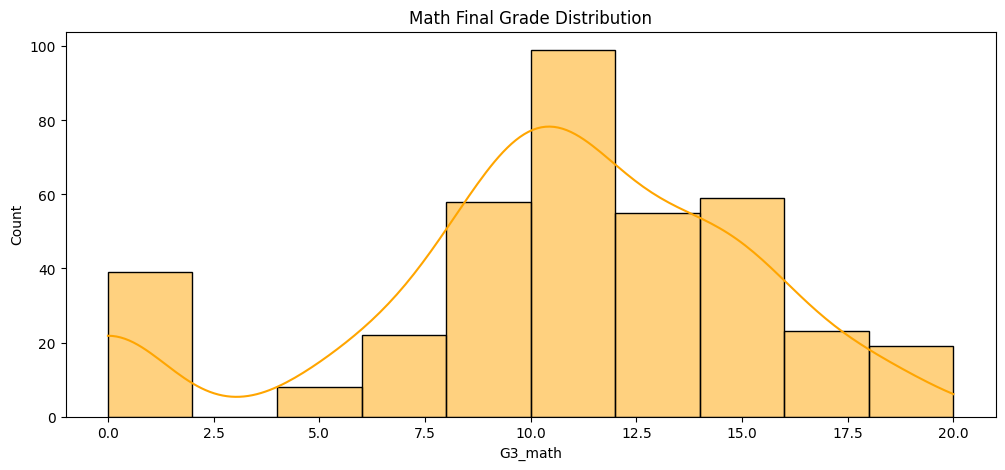

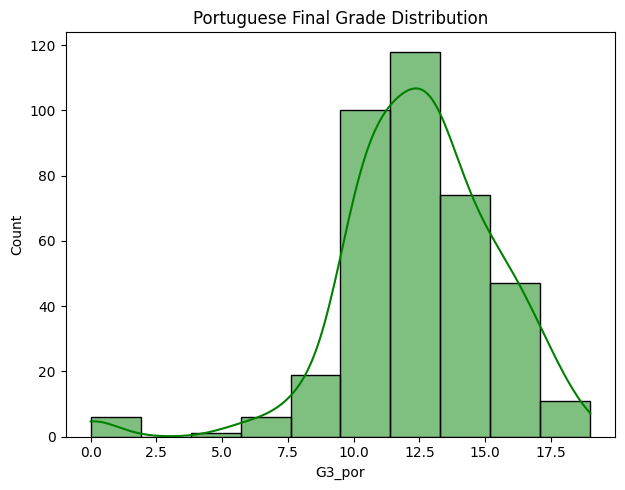

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

sns.histplot(combined_df['G3_math'], bins=10, kde=True, color='orange')
plt.title('Math Final Grade Distribution')

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 2)
sns.histplot(combined_df['G3_por'], bins=10, kde=True, color='green')
plt.title('Portuguese Final Grade Distribution')

plt.tight_layout()
plt.show()


**2. Correlation Analysis.**

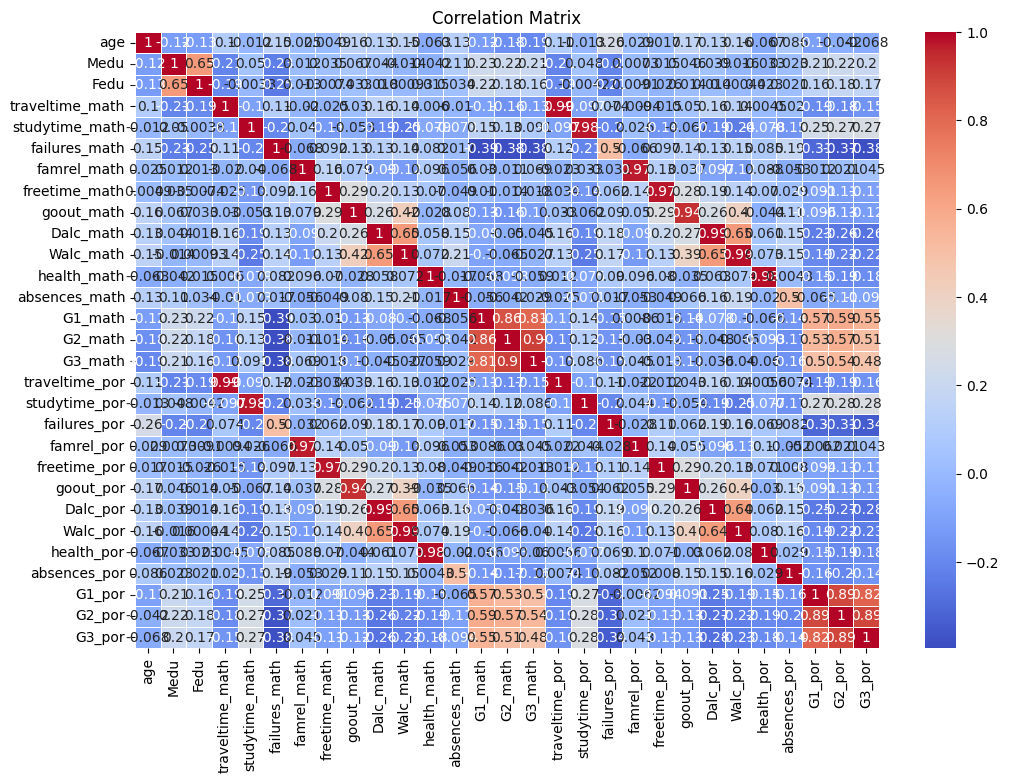

In [15]:
numeric_df = combined_df.select_dtypes(include=['int64', 'float64'])


plt.figure(figsize=(12,8))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**3. Create a Pass/Fail Label**

In [17]:
combined_df['pass_math'] = combined_df['G3_math'].apply(lambda x: 1 if x >= 10 else 0)
combined_df['pass_por'] = combined_df['G3_por'].apply(lambda x: 1 if x >= 10 else 0)

combined_df[['G3_math', 'pass_math', 'G3_por', 'pass_por']].head()

,G3_math,pass_math,G3_por,pass_por
0,6,0,11,1
1,6,0,11,1
2,10,1,12,1
3,15,1,14,1
4,10,1,13,1


# **Preprocessing of model**

**1. Encode Categorical Variables:**

In [18]:
from sklearn.preprocessing import LabelEncoder

# Select categorical columns
cat_cols = combined_df.select_dtypes(include=['object']).columns

# Apply Label Encoding
le = LabelEncoder()
for col in cat_cols:
    combined_df[col] = le.fit_transform(combined_df[col])

combined_df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por,pass_math,pass_por
0,0,0,18,1,0,0,4,4,0,4,...,4,1,1,3,4,0,11,11,0,1
1,0,0,17,1,0,1,1,1,0,2,...,3,1,1,3,2,9,11,11,0,1
2,0,0,15,1,1,1,1,1,0,2,...,2,2,3,3,6,12,13,12,1,1
3,0,0,15,1,0,1,4,2,1,3,...,2,1,1,5,0,14,14,14,1,1
4,0,0,16,1,0,1,3,3,2,2,...,2,1,2,5,0,11,13,13,1,1


**2. Split Data for Training:**

In [19]:
from sklearn.model_selection import train_test_split

# Features and target
X = combined_df.drop(['G3_math', 'G3_por', 'pass_math', 'pass_por'], axis=1)
y = combined_df['pass_math']  # or 'pass_por' or 'G3_math' for regression

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")


Training samples: 305
Testing samples: 77


# **Model Building & Evaluation**

**1.Train a Random Forest Classifier**

Random forest: collection of decision trees that work together to make predictions

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Features and target
X = combined_df.drop(['G3_math', 'G3_por', 'pass_math', 'pass_por'], axis=1)
y = combined_df['pass_math']  # Change to 'pass_por' if focusing on Portuguese

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 92.21%

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88        24
           1       0.96      0.92      0.94        53

    accuracy                           0.92        77
   macro avg       0.90      0.92      0.91        77
weighted avg       0.93      0.92      0.92        77



**2.Visualize Feature Importance**

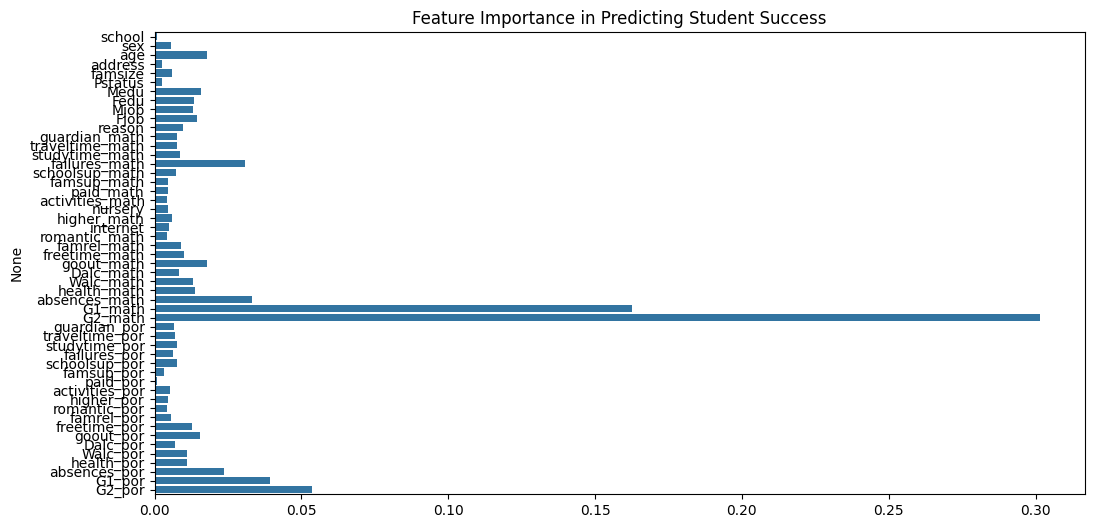

In [21]:
importances = rf.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(12,6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance in Predicting Student Success')
plt.show()


# **Visualizations**

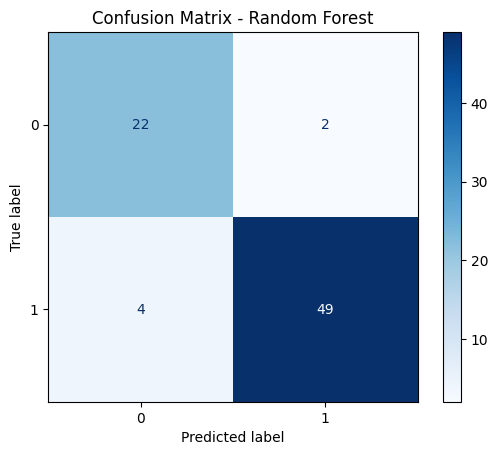

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()


**Grade Distribution vs. Prediction:**

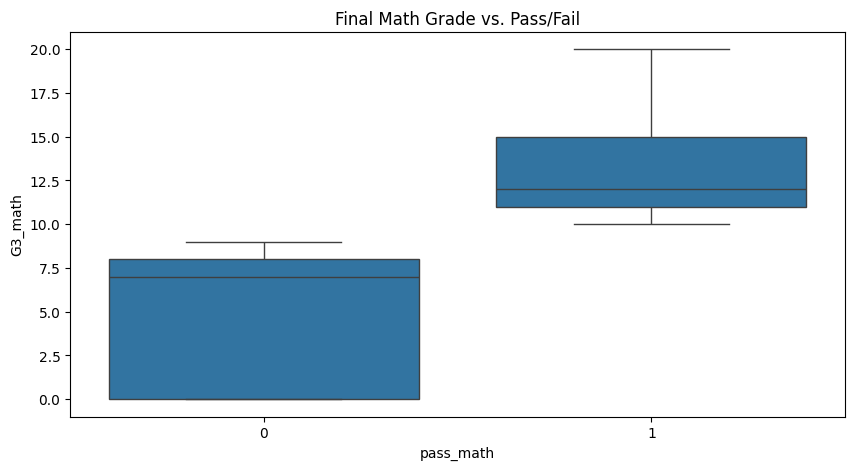

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(x='pass_math', y='G3_math', data=combined_df)
plt.title("Final Math Grade vs. Pass/Fail")
plt.show()


# **RESULT**

## ✅ **1. Model Performance**
The **Random Forest Classifier** achieved an impressive accuracy of **92.21%**, effectively predicting student success based on socioeconomic and academic data.

### **🔢 Evaluation Metrics:**
- **Accuracy:** 92.21%  
- **Precision:**  
  - Pass: 96%  
  - Fail: 85%  
- **Recall:**  
  - Pass: 92%  
  - Fail: 92%  
- **F1-Score:**  
  - Pass: 94%  
  - Fail: 88%  

The model shows balanced precision and recall, indicating reliable predictions across both pass and fail classes.

---

## 📉 **2. Confusion Matrix**
The confusion matrix below illustrates how well the model classified students into pass or fail categories.


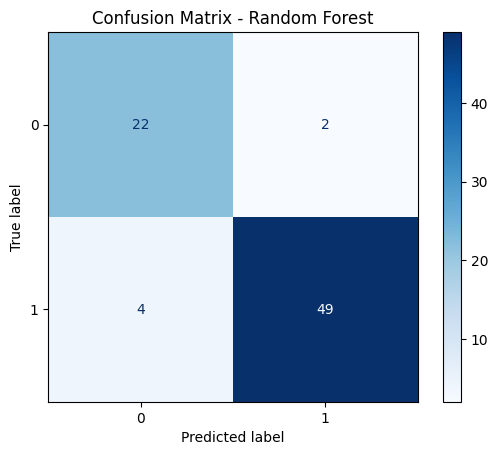

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()



---


# **📊 3. Feature Importance**









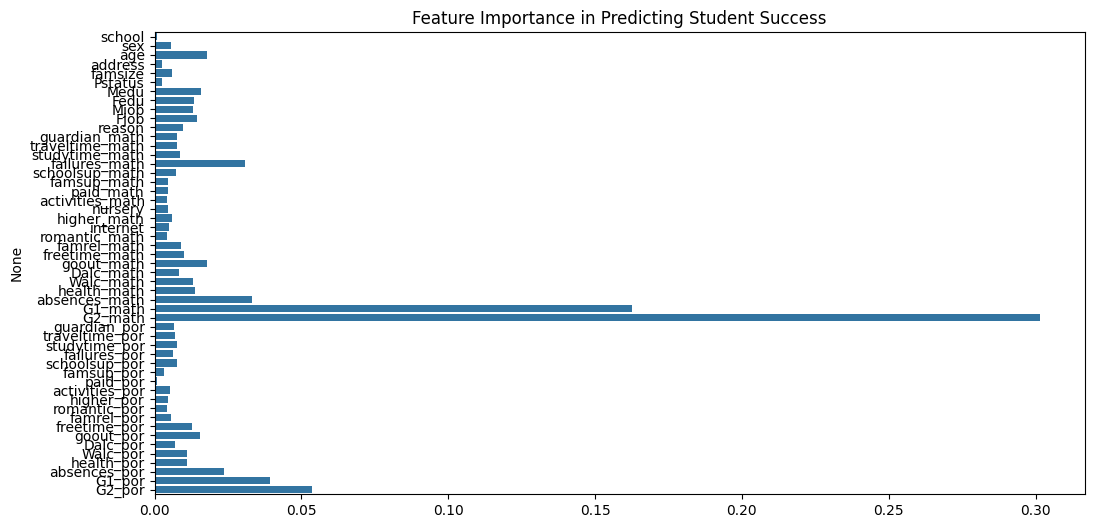

In [28]:
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(12,6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance in Predicting Student Success')
plt.show()




---


# **🧮 4. Insights & Key Takeaways**



*   Academic factors (like previous grades and study time) had the highest influence on student performance.
*   Socioeconomic factors (such as parental education and family support) also played a significant role.
*   Schools could use such predictive models to identify at-risk students early and offer targeted support.








---


# **🎯 5. Conclusion**


**💡 Future Scope:**
*   Incorporate advanced models like XGBoost for potential accuracy improvements.
*   Explore time-series analysis to understand performance trends over time.
*  Expand the dataset to include more diverse schools for broader applicability.




